# Engineering Analytics and Machine Learning Lab 8
## for Specialist Diploma in Internet of Things

### Author’s Name: Teo Kok Keong

### Property of Temasek Polytechnic, Copyright ©.
### For circulation within Temasek Polytechnic only.

# 1 Introduction to Keras

Keras is an open source neural network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, or Theano. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.

You can access link below the access the Keras' official documentation site:

[https://keras.io/](https://keras.io/)

In [1]:
# mport libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
import  seaborn as sns
import  matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


# 2 Neural Network for Classification with Keras

Remember  in the previous lab, we use various linear methods to identifiy hand-written digit from the digital dataset.In this lab, we are going to try to use NN to classification these hand-written digits if they could achieve higher  accuracy. In this example, we would load the dataset from tensorflow at:


[https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist)

Detail information on the digit dataset from UCI:

[http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)


Epoch 1/10
60000/60000 [==============================] - 42s 701us/step - loss: 0.2156 - acc: 0.9347
Epoch 2/10
60000/60000 [==============================] - 43s 712us/step - loss: 0.1068 - acc: 0.96751s - loss: 0.1
Epoch 3/10
60000/60000 [==============================] - 43s 713us/step - loss: 0.0817 - acc: 0.9748
Epoch 4/10
60000/60000 [==============================] - 44s 728us/step - loss: 0.0650 - acc: 0.9802TA: 1s - loss: 
Epoch 5/10
60000/60000 [==============================] - 44s 731us/step - loss: 0.0575 - acc: 0.98211s - los
Epoch 6/10
60000/60000 [==============================] - 46s 761us/step - loss: 0.0488 - acc: 0.9847
Epoch 7/10
60000/60000 [==============================] - 45s 744us/step - loss: 0.0475 - acc: 0.9856
Epoch 8/10
60000/60000 [==============================] - 45s 747us/step - loss: 0.0443 - acc: 0.9868
Epoch 9/10
60000/60000 [==============================] - 45s 755us/step - loss: 0.0408 - acc: 0.98690s - loss: 0.0409 - acc: 0.
Epoch 10/10
60000/

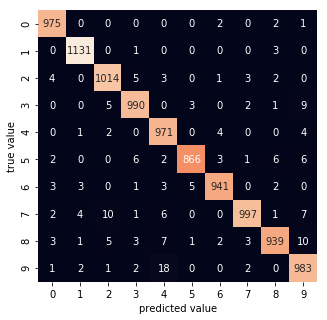

In [2]:
#  Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
#  Preprocess input data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#  Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#  Define model architecture

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))# This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# Fit model on training data

model.fit(X_train, Y_train,
          batch_size=32, epochs=10)
 
# Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
predictions = model.predict(X_test)
confusion  = confusion_matrix(Y_test.argmax(axis=1), predictions.argmax(axis=1))
plt.figure(figsize = (5,5))
sns.heatmap(confusion,square=False,annot=True,cbar=False,fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()


Convolution Neural Network (CNN) is a powerful network for images recognition application. We are going to implement a simple CNN for MNIST digit recognition data set. We are going to implement a simple CNN for MNIST digit recognition data set. Notice that we didn't have to reshape the image to one dimension vector. The images retain its spatial properties which is useful for the detection network

Epoch 1/5
60000/60000 [==============================] - 163s 3ms/step - loss: 0.2039 - acc: 0.9379
Epoch 2/5
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0852 - acc: 0.9742
Epoch 3/5
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0660 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0529 - acc: 0.9836
Epoch 5/5
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0473 - acc: 0.9858


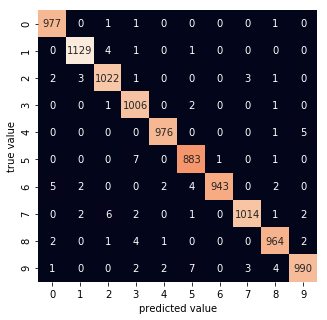

In [5]:
#from tensorflow.examples.tutorials.mnist import input_data
# Download the MNIS dataset
#mnist2 = input_data.read_data_sets('MNIST_data/', one_hot=True)
#  Load pre-shuffled MNIST data into train and test sets
#(X_train, y_train), (X_test, y_test) = mnist2.load_data()

#  Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 

#  Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
#  Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
#  Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
 
#  Define model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, epochs=5, verbose=1)
 
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
predictions = model.predict(X_test)
confusion  = confusion_matrix(Y_test.argmax(axis=1), predictions.argmax(axis=1))
plt.figure(figsize = (5,5))
sns.heatmap(confusion,square=False,annot=True,cbar=False,fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

Another implementation with bigger network.

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1496 - acc: 0.9542 - val_loss: 0.0411 - val_acc: 0.9876
Epoch 2/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0397 - acc: 0.9874 - val_loss: 0.0317 - val_acc: 0.9903
Epoch 3/5
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0267 - acc: 0.9914 - val_loss: 0.0272 - val_acc: 0.9909
Epoch 4/5
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0200 - acc: 0.9934 - val_loss: 0.0299 - val_acc: 0.9899
Epoch 5/5
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0162 - acc: 0.9948 - val_loss: 0.0327 - val_acc: 0.9902


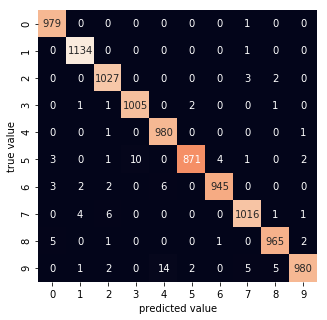

In [4]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

batch_size = 128
num_classes = 10
epochs = 5

# input image dimensions
img_x, img_y = 28, 28

# load the MNIST data set, which already splits into train and test sets for us
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
predictions = model.predict(x_test)
confusion  = confusion_matrix(Y_test.argmax(axis=1), predictions.argmax(axis=1))
plt.figure(figsize = (5,5))
sns.heatmap(confusion,square=False,annot=True,cbar=False,fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

## Exercise

Change the various parameters of the CNN and fully connected  Neural Network to find the optimal recognition accuracy result. Examples: increase the number of epochs.